In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Load and explore data

In [13]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# load (downloaded if needed) the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

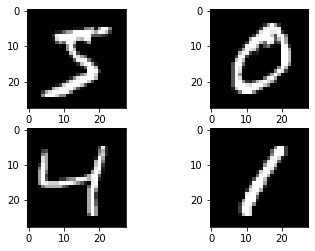

In [14]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

# Preproccessing 

In [15]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [16]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [17]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [18]:
num_classes

10

# MLP

In [19]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils import np_utils

In [20]:
def baseline_model():
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
model = baseline_model()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=200, verbose=2)
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/10
300/300 - 3s - loss: 0.2754 - accuracy: 0.9212 - val_loss: 0.1387 - val_accuracy: 0.9603
Epoch 2/10
300/300 - 2s - loss: 0.1097 - accuracy: 0.9678 - val_loss: 0.0984 - val_accuracy: 0.9695
Epoch 3/10
300/300 - 3s - loss: 0.0721 - accuracy: 0.9787 - val_loss: 0.0789 - val_accuracy: 0.9751
Epoch 4/10
300/300 - 3s - loss: 0.0500 - accuracy: 0.9858 - val_loss: 0.0705 - val_accuracy: 0.9782
Epoch 5/10
300/300 - 3s - loss: 0.0366 - accuracy: 0.9893 - val_loss: 0.0676 - val_accuracy: 0.9770
Epoch 6/10
300/300 - 3s - loss: 0.0282 - accuracy: 0.9922 - val_loss: 0.0591 - val_accuracy: 0.9815
Epoch 7/10
300/300 - 3s - loss: 0.0194 - accuracy: 0.9954 - val_loss: 0.0612 - val_accuracy: 0.9812
